# Building ML Models for SRF Fault Classification
Chris Tennant <br>
_December 17, 2019_
***

Import `pandas`, `matplotlib`, `numpy` and `os` libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import feather

dir = Path('C:/Users/tennant/Desktop/rfw_tsf_extractor-Spring-2018/extracted')

Read in .csv files with features computed by `tsfresh`.

In [2]:
y_master = pd.read_csv(dir/'y_fault_master.csv')

In [3]:
X_master = pd.read_csv(dir/'X_fault_master.csv')

In [4]:
y_master = y_master.drop(columns=['zone', 'time'])

In [5]:
X_master = X_master.drop(columns=['zone', 'time'])

In [6]:
top50 = ['GMES__fft_coefficient__coeff_16__attr_"real"',
 'PLDE__fft_coefficient__coeff_16__attr_"real"',
 'GMES__fft_coefficient__coeff_11__attr_"angle"',
 'PMES__index_mass_quantile__q_0.9',
 'CRRP__fft_coefficient__coeff_64__attr_"imag"',
 'CRRP__fft_coefficient__coeff_79__attr_"abs"',
 'CRFP__ar_coefficient__k_10__coeff_1',
 'GMES__fft_coefficient__coeff_63__attr_"imag"',
 'PMES__fft_coefficient__coeff_0__attr_"abs"',
 'CRRP__maximum',
 'PMES__index_mass_quantile__q_0.8',
 'GMES__fft_coefficient__coeff_30__attr_"imag"',
 'GMES__fft_coefficient__coeff_79__attr_"angle"',
 'IMES__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8',
 'IMES__fft_coefficient__coeff_2__attr_"abs"',
 'PLDE__minimum',
 'PLDE__fft_coefficient__coeff_28__attr_"real"',
 'IMES__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
 'CRRP__agg_linear_trend__f_agg_"min"__chunk_len_10__attr_"stderr"',
 'DFQES__fft_coefficient__coeff_52__attr_"abs"',
 'CRRP__approximate_entropy__m_2__r_0.5',
 'CRRP__fft_coefficient__coeff_29__attr_"abs"',
 'CRRP__fft_coefficient__coeff_48__attr_"imag"',
 'DFQES__ratio_value_number_to_time_series_length',
 'PMES__number_peaks__n_5',
 'PMES__energy_ratio_by_chunks__num_segments_10__segment_focus_5',
 'PLDE__fft_coefficient__coeff_49__attr_"angle"',
 'IMES__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
 'CRRP__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"intercept"',
 'GASK__ar_coefficient__k_10__coeff_1',
 'CRRP__fft_coefficient__coeff_75__attr_"angle"',
 'IASK__fft_coefficient__coeff_45__attr_"abs"',
 'DETA2__number_peaks__n_3',
 'CRFPP__percentage_of_reoccurring_values_to_all_values',
 'CRRP__fft_coefficient__coeff_64__attr_"angle"',
 'GMES__fft_coefficient__coeff_28__attr_"real"',
 'CRRP__fft_coefficient__coeff_31__attr_"abs"',
 'CRRP__fft_coefficient__coeff_96__attr_"imag"',
 'GASK__ratio_beyond_r_sigma__r_10',
 'PLDE__fft_coefficient__coeff_33__attr_"real"',
 'CRRP__fft_coefficient__coeff_33__attr_"abs"',
 'CRRP__standard_deviation',
 'GMES__spkt_welch_density__coeff_5',
 'CRRP__fft_coefficient__coeff_76__attr_"abs"',
 'PLDE__fft_coefficient__coeff_17__attr_"abs"',
 'DFQES__fft_coefficient__coeff_51__attr_"abs"',
 'CRFP__time_reversal_asymmetry_statistic__lag_1',
 'DFQES__fft_coefficient__coeff_50__attr_"real"',
 'IMES__linear_trend__attr_"rvalue"',
 'PMES__energy_ratio_by_chunks__num_segments_10__segment_focus_9']

In [7]:
X_master = X_master[top50]

In [8]:
print("Number of training examples: {}".format(X_master.shape[0]))
print("Number of features: {}".format(X_master.shape[1]))
print("Number of categories: {}".format(y_master['label'].nunique()))

Number of training examples: 330
Number of features: 50
Number of categories: 4


Histogram showing how the distribution of the types of faults in the data set.

In [9]:
y_master['label'].value_counts()

Single Cav Turn off    140
Quench                 114
Microphonics            50
E_Quench                26
Name: label, dtype: int64

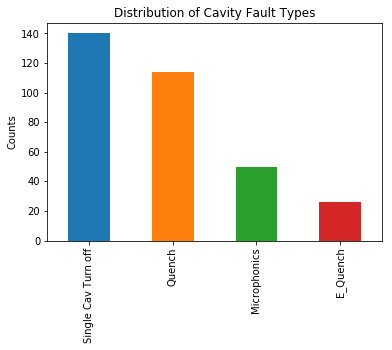

In [10]:
#y_master.T.head(55)
y_master['label'].value_counts().plot(kind='bar');
plt.title("Distribution of Cavity Fault Types");
plt.ylabel("Counts");
#plt.savefig("faults_bar.png", bbox_inches = "tight", dpi=200)

Use `impute` from `tsfresh` to replace all `NaNs` and `infs` from the `DataFrame` with average/extreme values from the same columns.

In [11]:
from tsfresh.utilities.dataframe_functions import impute

X_master = impute(X_master)

Need to convert categorical labels to numeric labels using `LabelEncoder`.

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_master_encoded = pd.Series(le.fit_transform(np.ravel(y_master)), y_master.index)
np.save('le_fault_classes.npy', le.classes_)

Split the data into training and test sets using `train_test_split` from `sklearn`. Keep 30% of the data for testing.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_master, y_master_encoded, test_size = 0.3, random_state=123, stratify=y_master)

In [14]:
print("The number of training examples is: {}".format(X_train.shape[0]))
print("The number of test examples is: {}".format(X_test.shape[0]))

The number of training examples is: 231
The number of test examples is: 99


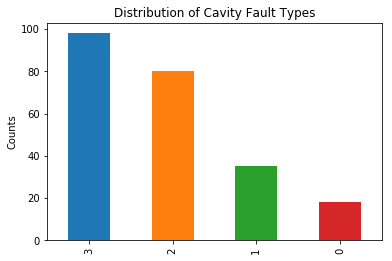

In [15]:
y_train.value_counts().plot(kind='bar');
plt.title("Distribution of Cavity Fault Types");
plt.ylabel("Counts");
#plt.savefig("faults_bar.png", bbox_inches = "tight", dpi=200)

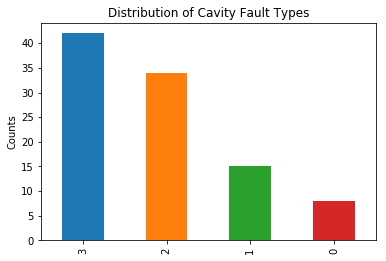

In [16]:
y_test.value_counts().plot(kind='bar');
plt.title("Distribution of Cavity Fault Types");
plt.ylabel("Counts");
#plt.savefig("faults_bar.png", bbox_inches = "tight", dpi=200)

Need to standardize features by removing the mean and scaling to unit variance. Note to avoid _data leak_ we standardize the training data and then use the same step (including the same values for mean and standard deviation) on the test set.
<br><br>
_(Note, it may be wise to standardize the initial time-series signals before computing features. However, it requires having all the data together in a single `DataFrame`. Due to computational issues with `tsfresh`, this is not possible and need to compute small batches of data at a time)._

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)

In [18]:
X_train_scaled.describe()

,"GMES__fft_coefficient__coeff_16__attr_""real""","PLDE__fft_coefficient__coeff_16__attr_""real""","GMES__fft_coefficient__coeff_11__attr_""angle""",PMES__index_mass_quantile__q_0.9,"CRRP__fft_coefficient__coeff_64__attr_""imag""","CRRP__fft_coefficient__coeff_79__attr_""abs""",CRFP__ar_coefficient__k_10__coeff_1,"GMES__fft_coefficient__coeff_63__attr_""imag""","PMES__fft_coefficient__coeff_0__attr_""abs""",CRRP__maximum,...,"CRRP__fft_coefficient__coeff_33__attr_""abs""",CRRP__standard_deviation,GMES__spkt_welch_density__coeff_5,"CRRP__fft_coefficient__coeff_76__attr_""abs""","PLDE__fft_coefficient__coeff_17__attr_""abs""","DFQES__fft_coefficient__coeff_51__attr_""abs""",CRFP__time_reversal_asymmetry_statistic__lag_1,"DFQES__fft_coefficient__coeff_50__attr_""real""","IMES__linear_trend__attr_""rvalue""",PMES__energy_ratio_by_chunks__num_segments_10__segment_focus_9
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,...,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.441848e-18,1.249602e-17,2.210834e-17,6.209559e-16,-5.779408e-17,4.998407e-17,-1.696575e-16,-7.593733e-17,4.421667e-17,-1.682156e-16,...,-2.859665e-17,-2.306957e-17,-1.970526e-17,-6.728624e-17,-2.751527e-17,1.186220e-16,-2.050128e-18,4.637945e-17,-1.730218e-17,-1.826341e-17
std,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,...,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00,1.002172e+00
min,-2.264932e+00,-1.456382e+00,-2.278627e+00,-3.607578e+00,-3.720977e+00,-1.161660e+00,-2.794295e+00,-2.754676e+00,-1.589548e+00,-1.179354e+00,...,-9.806926e-01,-1.051305e+00,-5.213461e-01,-1.230659e+00,-1.309113e+00,-1.190637e+00,-1.134937e+01,-4.396771e+00,-1.336373e+00,-1.225846e+00
25%,-5.948612e-01,-6.473247e-01,-5.733937e-01,-6.214392e-01,-6.604820e-01,-7.949577e-01,-7.625795e-01,-8.034004e-01,-9.497222e-01,-8.869943e-01,...,-6.624637e-01,-7.274282e-01,-4.850350e-01,-8.005685e-01,-8.591979e-01,-7.348941e-01,3.435627e-03,-5.077553e-01,-1.019010e+00,-7.061651e-01
50%,3.431904e-01,-3.669011e-01,-4.207437e-01,-9.010308e-03,-3.816247e-01,-3.049869e-01,-9.419592e-02,-1.609661e-01,-1.430026e-01,-3.155709e-01,...,-2.690029e-01,-3.037953e-01,-3.110503e-01,-2.574702e-01,-3.236441e-01,-3.626952e-01,3.757262e-03,7.301309e-02,-1.515548e-01,-2.560074e-01
75%,7.563850e-01,5.632664e-01,3.659149e-02,7.583529e-01,5.885258e-01,5.413576e-01,8.505553e-01,6.584717e-01,8.784672e-01,9.106349e-01,...,3.633815e-01,5.226174e-01,2.631892e-02,6.637341e-01,8.728161e-01,4.878684e-01,5.701863e-03,5.284031e-01,7.870350e-01,4.650467e-01
max,1.503770e+00,2.594619e+00,2.320075e+00,2.066524e+00,3.542926e+00,3.971289e+00,2.588753e+00,2.544378e+00,2.254051e+00,2.100072e+00,...,7.465661e+00,6.318100e+00,9.230763e+00,3.373723e+00,2.368119e+00,3.787720e+00,1.010137e+01,3.181479e+00,1.386928e+00,6.057684e+00


Save (mean, variance) values as `numpy` arrays for use with saved model when deployed.

In [25]:
X_train_mean = sc.fit(X_train).mean_
X_train_var = sc.fit(X_train).scale_

#np.save('RF_FAULT_top50_mean', X_train_mean, allow_pickle=False)
#np.save('RF_FAULT_top50_var', X_train_var, allow_pickle=False)